In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [53]:
DATA_PATH = 'datasets/preprocessed/CICIDS2017.csv'
data = pd.read_csv(DATA_PATH)

data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [54]:
# since many columns just have 0 values, drop them

data = data.loc[:, (data!=0).any(axis=0)]
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [55]:
for column in data.columns:
    if column == ' Label': continue 
    data[column] = data[column]  / data[column].abs().max() 

X = data.drop(' Label', axis=1)
y = data[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,135447.000000,1.354470e+05,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,...,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000,135447.000000
mean,0.135492,1.352353e-01,0.002538,0.001566,0.005142,0.001165,0.046131,0.018929,0.042682,0.032123,...,0.001724,0.413185,0.001850,0.000321,0.002083,0.001780,0.086100,0.055242,0.107374,0.064739
std,0.301464,2.624571e-01,0.008351,0.007800,0.017667,0.008113,0.159634,0.110798,0.130664,0.119134,...,0.006555,0.080090,0.007747,0.005065,0.008765,0.007619,0.182197,0.195286,0.224375,0.165384
min,0.000000,-8.333338e-09,0.000518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001221,5.843086e-04,0.001035,0.000340,0.000142,0.000000,0.000514,0.000000,0.001552,0.000000,...,0.000518,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001221,1.217630e-02,0.001553,0.001360,0.000164,0.000031,0.001712,0.000000,0.002241,0.000792,...,0.001036,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.001221,7.358818e-02,0.002588,0.001700,0.000350,0.002243,0.002997,0.004076,0.008275,0.001534,...,0.002071,0.384615,0.000019,0.000000,0.000019,0.000019,0.068686,0.000000,0.068788,0.061849
max,1.000000,9.999995e-01,0.909420,1.000000,0.648788,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.909373,1.000000,0.501000,1.000000,0.559000,0.501000,1.000000,1.000000,1.000000,1.000000


In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9998671066911781


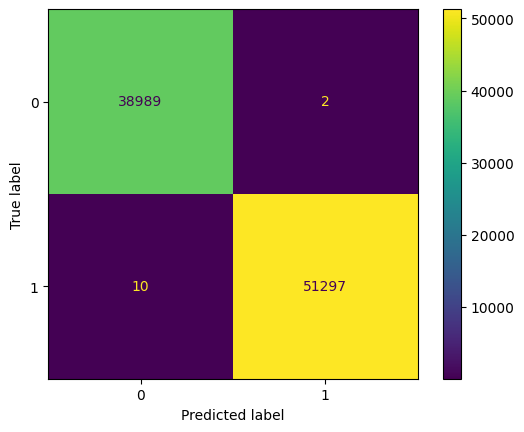

In [59]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();